## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf

D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

## Read data

In [2]:
data = pd.read_csv("../Basic Data Exploration/data.csv")

## View samples
The "id" attribute is pretty much useless. <br>
The "diagnosis" column will be used as target. So it will be removed later on for classification

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We've got 569 records and 30 features (Excluding "id" and "diagnosis")

In [4]:
data.shape

(569, 32)

## Stats about data
The mean is pretty distributed. So is the standard distribution. <br>
For any classification to work, we need ot first normalize to correct these different scales of the data.
<br> This will also fiz the mn and max values(range).
<br>We've got no null values, althought there is an unwanted column in some forms of the csv file. (It is already removed here)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Prepare data
Seperate targets from features<br>
Normalize the data (Ensure there are no categorical values in your dataframe before using this method)

In [6]:
target = data.diagnosis
data_clean = data.drop(["id","diagnosis"],axis = 1)
data_norm = (data_clean-data_clean.mean())/data_clean.std()

## View normalized data

In [7]:
data_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


## Visualize the attributes
Violin plots are by far my favourite when it comes to visualization.
<br> They essentially plot the kde of an attribute but seperated based on target value and<br>
plotted on either side of the column ( ```split = True```)
### The first 10 features
The medians (and sometimes means) are decently seperated for the ttwo classes. And hence most features are useful. <br>
Except maybe fractal_dimension_mean and symmetry_mean (Last two)

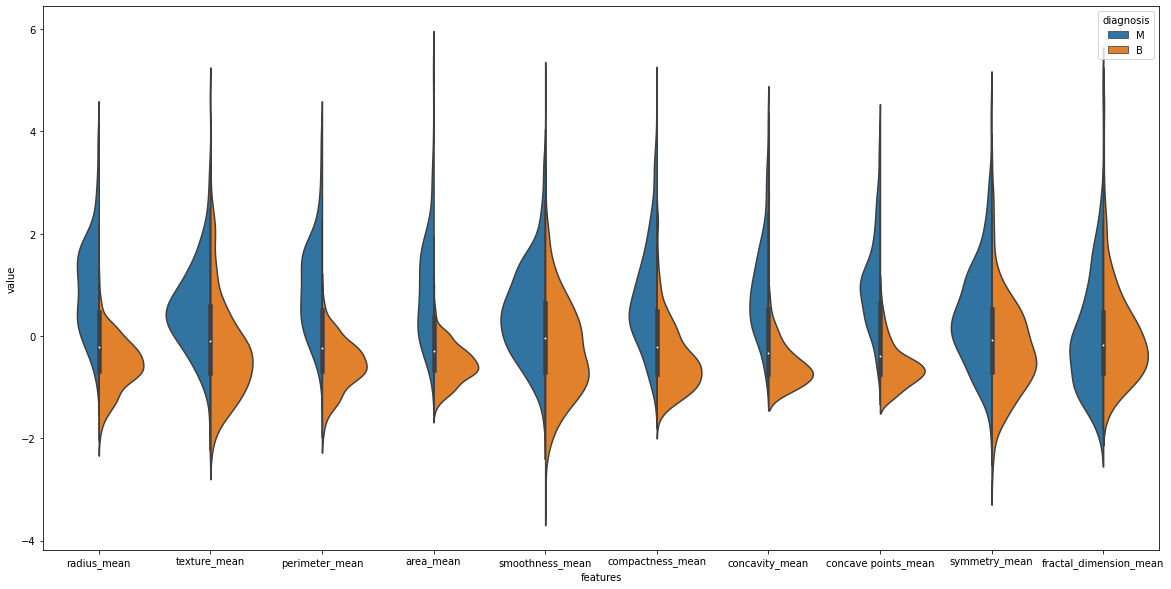

In [8]:
data_sec = pd.concat([target,data_norm.iloc[:,:10]],axis =1)
data_sec = pd.melt(data_sec,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize = (20,10))
sns.violinplot(x = "features",y = "value",hue = "diagnosis",data =data_sec,split = True)

### The next 10 features
The dsitribution of features are almost too similar and hence may not make good features. <br>
Remember we aren't picking features yet. Just observing distributions

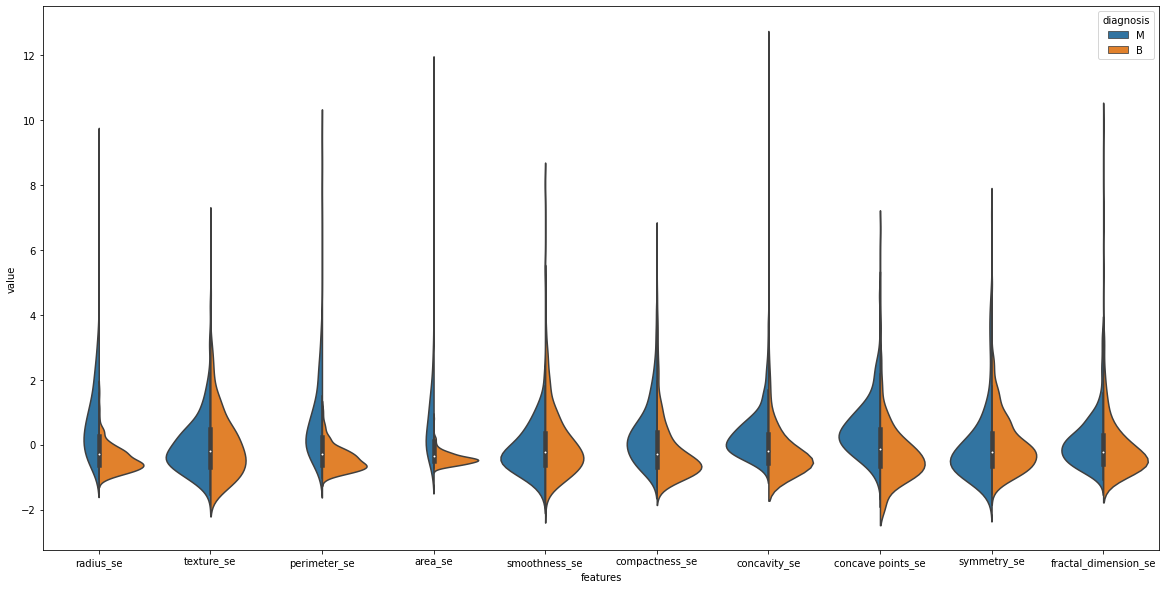

In [9]:
data_sec = pd.concat([target,data_norm.iloc[:,10:20]],axis =1)
data_sec = pd.melt(data_sec,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize = (20,10))
sns.violinplot(x = "features",y = "value",hue = "diagnosis",data =data_sec,split = True)

### The last 10 features
The seperation makes a comeback! Decent distribution difference is seen. <br>


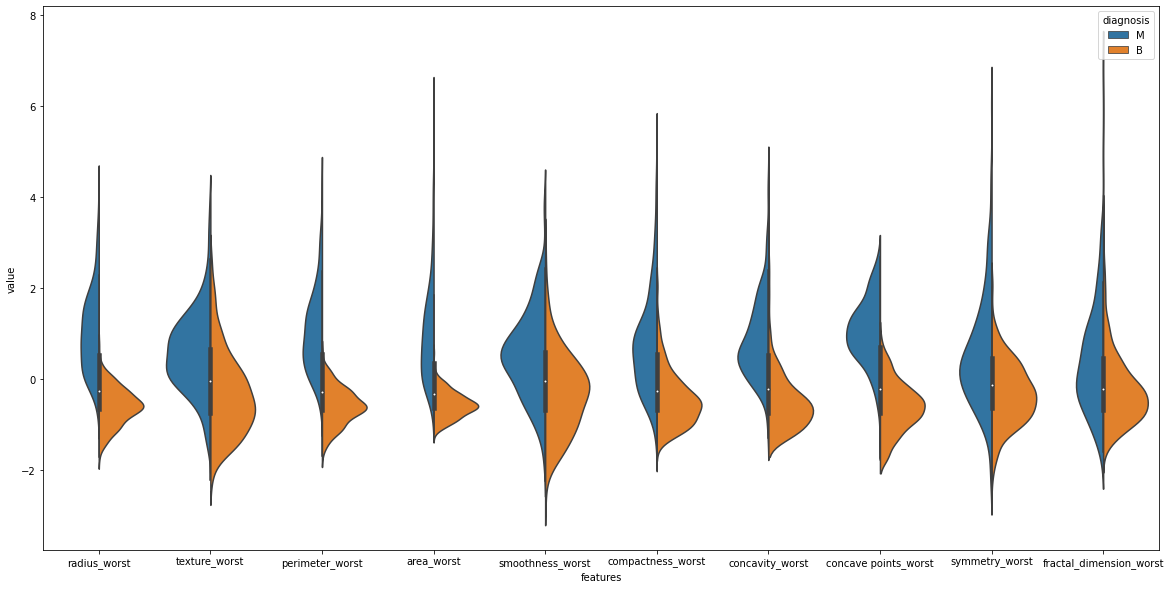

In [10]:
data_sec = pd.concat([target,data_norm.iloc[:,20:30]],axis =1)
data_sec = pd.melt(data_sec,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize = (20,10))
sns.violinplot(x = "features",y = "value",hue = "diagnosis",data =data_sec,split = True)

## Class distribution
The distribution is skewed. <br>
There will be an obvious bias towars the majority class. <br>
Baseline accuracy means that, even if the classfier predicts the same class for every record, it will still achieve said accuracy. And it is important that our classifiers work better than this (atleast). Otherwise the classificatier may as well be outputting constant values. 

B    357
M    212
Name: diagnosis, dtype: int64
Baseline majority classifier is : 62.741652021089635


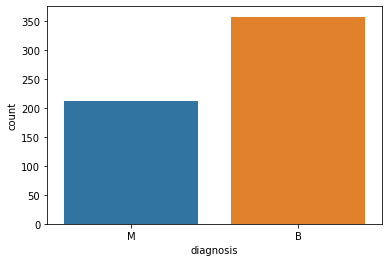

In [11]:
sns.countplot(target)
b = target.value_counts()[0]
m = target.value_counts()[1]
print(target.value_counts())
print("Baseline majority classifier is :",(b/(b+m))*100)

## Splitting into train,val,test sets
Couldn't find any function that splits three ways. So used ```train_test_split()``` twice!

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(data_norm,target,test_size = 0.3,shuffle = True,random_state = 0)
X_val,X_test,Y_val,Y_test = train_test_split(X_test,Y_test,test_size = 0.5,shuffle = True,random_state = 0)

### Sanity checking

In [13]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

(398, 30) (398,)
(85, 30) (85,)
(86, 30) (86,)


## Training classifiers
Finally we are here. We're gonna be looking at logistic regression, neural nets, knn and lda for this session <br>
Random forest and decision trees and other methods will be done later
### Logisitc Regression without regularization
The model does pretty well with a test accuracy of 96.5%<br>
Admittedly, the data does not need regularization, but Uni asks for stupid stuff. Bear with me

Train : 98.99497487437185 % Accuracy
Val : 100.0 % Accuracy
Test : 96.51162790697676 % Accuracy


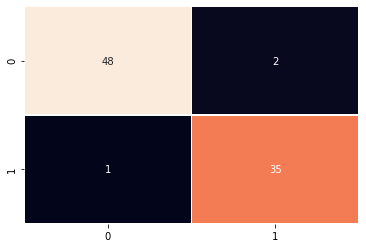

In [14]:
model = LogisticRegression().fit(X_train,Y_train)
print("Train :",model.score(X_train,Y_train)*100,"% Accuracy")
print("Val :",model.score(X_val,Y_val)*100,"% Accuracy")
print("Test :",model.score(X_test,Y_test)*100,"% Accuracy")
conf = confusion_matrix(model.predict(X_test),Y_test)
sns.heatmap(conf,annot = True,cbar = False,linewidth = 0.5)

### Logistic Regression with l1 regularization
l1 regularization calculates the norm of the weights or coefficients or theta vector (whatever way you have studied) and adds them up. This sum is multiplied by lambda (The regularization factor). And this product is subtracted during weight update step in every iteration. Resultant weight matrix/vector might be sparse. <br><br>
In ```sklearn.linear_model.LogisticRegression``` , there is no lambda.<br>
Instead there is the "c-parameter" (If you've learnt about SVM's). It is essentially the inverse of the regularization parameter. <br><br>
The values range from 1-300. The best performance on validation set is selected. Hyperparameters are always tested on val/hold-out set. And NOT test set. Otheriwse you will have overfit on the test set and results will be biased<br><br>
Worse than previous model. 95.3% accuracy on test set


     C       Train        Val       Test
0    1   98.743719  96.470588  96.511628
1    3   98.994975  96.470588  90.697674
2   10   98.994975  95.294118  90.697674
3   30  100.000000  96.470588  91.860465
4  100  100.000000  96.470588  91.860465
5  300  100.000000  96.470588  91.860465


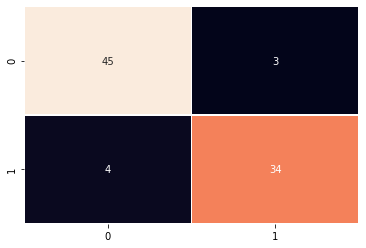

In [17]:
C_params = [1,3,10,30,100,300]
train = list()
test = list()
val = list()
for c in C_params:
    model = LogisticRegression(penalty = "l1",solver = "liblinear",C = c,max_iter = 100).fit(X_train,Y_train)
    train.append(model.score(X_train,Y_train)*100)
    val.append(model.score(X_val,Y_val)*100)
    test.append(model.score(X_test,Y_test)*100)
res = pd.DataFrame([i for i in zip(C_params,train,val,test)],columns = ["C","Train","Val","Test"])
print(res)
conf = confusion_matrix(model.predict(X_test),Y_test)
sns.heatmap(conf,annot = True,cbar = False,linewidth = 0.5)

### Logisitc Regression with l2 regularization
Very similar to l1 regularization. But instead of the norm, the square norm is taken for the summation. Also called the Frobenius Norm. A factor of 1/2 is multiplied to offset the square during partial derivative calculation. <br><br>
The model does decent work. But still chooses the least value of regularization. Bcs it's not needed<br>
96.51% on test set

     C       Train         Val       Test
0    1   98.994975  100.000000  96.511628
1    3   98.994975   97.647059  91.860465
2   10   98.994975   97.647059  91.860465
3   30   98.994975   96.470588  90.697674
4  100   99.497487   95.294118  91.860465
5  300  100.000000   95.294118  91.860465


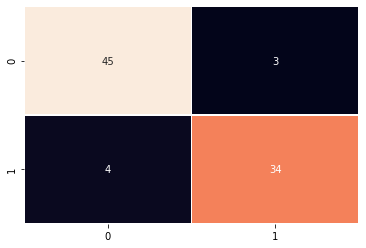

In [18]:
C_params = [1,3,10,30,100,300]
train = list()
test = list()
val = list()
for c in C_params:
    model = LogisticRegression(penalty = "l2",solver = "liblinear",C = c,max_iter = 100).fit(X_train,Y_train)
    train.append(model.score(X_train,Y_train)*100)
    val.append(model.score(X_val,Y_val)*100)
    test.append(model.score(X_test,Y_test)*100)
res = pd.DataFrame([i for i in zip(C_params,train,val,test)],columns = ["C","Train","Val","Test"])
print(res)
conf = confusion_matrix(model.predict(X_test),Y_test)
sns.heatmap(conf,annot = True,cbar = False,linewidth = 0.5)

### KNN classification
KNN is not a classifier like the other methods tried here. It is essentally a clustering technique that is supervised. <br>
It does not have any objective function to minimize and only copies to memory during execution to take majority vote.<br>
Every stats algorithm is explicitly or implicitly minimizing some objective, even if there are no parameters or hyperparameters, and even if the minimization is not done iteratively. <br><br>
Typically, we define a hypothesis space of possible classifiers, and the loss function is defined on this space. I.e. it maps each possible classifier to a value measuring how good/bad it is. Learning then consists of selecting the classifier with minimal loss. The KNN objective function isn't defined on the space of classifiers, but on the space of class labels for a given input point.<br><br>
Comparing methods like these actually don't make much sense. But nonetheless works quite well.
94.18% on Test set

Train:  96.98492462311557
Validation:  97.6470588235294
Test:  94.18604651162791


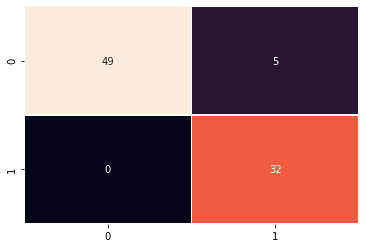

In [131]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train,Y_train)
print("Train: ",knn.score(X_train,Y_train)*100)
print("Validation: ",knn.score(X_val,Y_val)*100)
print("Test: ",knn.score(X_test,Y_test)*100)
conf = confusion_matrix(knn.predict(X_test),Y_test)
sns.heatmap(conf,annot = True,cbar = False,linewidth = 0.5)

### LDA classification

LDA is also called Fisher’s linear discriminant. The objective function is called Fisher’s criterion J(w). The Fisher criterion is defined to be the ratio of the between-class variance to the within-class variance. <br><br>

Has a credible loss function based on which to train.
Check my notebok on PCA nad LDA to know more.
<br><br> Gets about 95.34% on Test set

Train:  96.23115577889448
Validation:  98.82352941176471
Test:  95.34883720930233


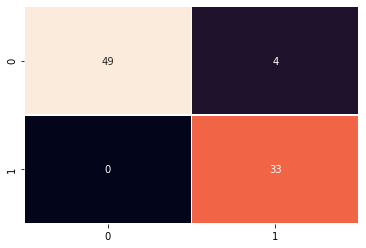

In [95]:
lda = LinearDiscriminantAnalysis().fit(X_train,Y_train)
print("Train: ",lda.score(X_train,Y_train)*100)
print("Validation: ",lda.score(X_val,Y_val)*100)
print("Test: ",lda.score(X_test,Y_test)*100)
conf = confusion_matrix(lda.predict(X_test),Y_test)
sns.heatmap(conf,annot = True,cbar = False,linewidth = 0.5)

### Neural Net
A shallow net is trained. Very prone to overfitting on such a small dataset.
<br><br>
Gets about 96.51% on Test set

In [122]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = (30,)),
                           tf.keras.layers.Dense(units = 128,activation = tf.nn.relu),
                           tf.keras.layers.Dense(units = 1,activation = tf.nn.tanh)])
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
model.fit(X_train,Y_train.map({'M':0,'B':1}),epochs = 20)

Epoch 1/20
398/398 [==============================] - 0s 321us/sample - loss: 1.8608 - acc: 0.6231
Epoch 2/20
398/398 [==============================] - 0s 75us/sample - loss: 0.2946 - acc: 0.9271
Epoch 3/20
398/398 [==============================] - 0s 73us/sample - loss: 0.1806 - acc: 0.9648
Epoch 4/20
398/398 [==============================] - 0s 74us/sample - loss: 0.1291 - acc: 0.9724
Epoch 5/20
398/398 [==============================] - 0s 78us/sample - loss: 0.1109 - acc: 0.9749
Epoch 6/20
398/398 [==============================] - 0s 78us/sample - loss: 0.1027 - acc: 0.9749
Epoch 7/20
398/398 [==============================] - 0s 73us/sample - loss: 0.0955 - acc: 0.9724
Epoch 8/20
398/398 [==============================] - 0s 75us/sample - loss: 0.0913 - acc: 0.9724
Epoch 9/20
398/398 [==============================] - 0s 73us/sample - loss: 0.0872 - acc: 0.9749
Epoch 10/20
398/398 [==============================] - 0s 80us/sample - loss: 0.0838 - acc: 0.9774
Epoch 11/20
398/39

In [123]:
print("Train accuracy:",model.evaluate(X_train,Y_train.map({'M':0,'B':1}))[1]*100)
print("Val accuracy:",model.evaluate(X_val,Y_val.map({'M':0,'B':1}))[1]*100)
print("Test accuracy:",model.evaluate(X_test,Y_test.map({'M':0,'B':1}))[1]*100)

398/398 [==============================] - 0s 168us/sample - loss: 0.0585 - acc: 0.9874
Train accuracy: 98.74371886253357
85/85 [==============================] - 0s 66us/sample - loss: 0.0679 - acc: 0.9647
Val accuracy: 96.47058844566345
86/86 [==============================] - 0s 46us/sample - loss: 0.1180 - acc: 0.9651
Test accuracy: 96.51162624359131


<br><br><br><br><br>
<center><h1>Results<h1></center>
<table>
    <tr>
        <th>#</th>
        <th>Classifier</th>
        <th> Test set accuracy</th>
    </tr>
    <tr>
        <td>1</td>
        <td>Logisitc Regression without Regularization</td>
        <td>96.511%</td>
    </tr>
     <tr>
        <td>2</td>
        <td>Logisitc Regression without L1 Regularization</td>
        <td>95.348%</td>
    </tr>
     <tr>
        <td>3</td>
        <td>Logisitc Regression without L2 Regularization</td>
        <td>96.511%</td>
    </tr>
     <tr>
        <td>4</td>
        <td>KNN classifier</td>
        <td>94.18%</td>
    </tr>
     <tr>
        <td>5</td>
        <td>LDA</td>
        <td>95.348%</td>
    </tr>
     <tr>
        <td>6</td>
        <td>Shallow Neural Net</td>
        <td>96.511%</td>
    </tr>
    </table>

<center><h3>End of Notebook</h3></center>